In [ ]:
#У приложеном фајлу дати су подаци о студентима који су положили пријемни испит на нашем институту протеклих година. 
@Ваш задатак је да направите што прецизнији модел, који ће за дате податке о студенту предвиђати његов број поена на пријемном испиту (последња колона - П.П.). 
@Резултат треба да буде исписан у конзоли као један цео број, без икаквих додатних знакова. Решење предати као уредно написану Jupyter свеску.
#У поступку креирања коначног модела прођите кроз све фазе овог процеса (анализа података, интервенције над подацима (ако има потребе), креирање иницијалног(их) модела, подешавање параметара модела, валидација, тестирање).
#Ваш модела треба да врши предикцију броја поена које ће кандидат освојити на пријемном на основу следећих података о кандидату: Тип средње школе, Назив средње школе, Град средње школе и С.Ш. поени.



In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df1 = pd.read_excel("studenti.xlsx")

In [76]:
df1.shape

(384, 13)

In [77]:
df1.head(10)

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок
0,Софтверско инжињерство,2019,Гимназија,Прва крагујевачка гимназија,Крагујевац,2019.0,4.13,4.20,4.54,4.08,16.95,40,Први конкурсни рок
1,Софтверско инжињерство,2020,Техничка,Прва Теничка школа,Крагујевац,2020.0,4.93,5.00,5.00,5.00,19.93,60,Први конкурсни рок
2,Софтверско инжињерство,2019,Техничка,Права Техничка школа,Крагујевац,2019.0,4.20,4.57,4.62,4.86,18.25,52,Први конкурсни рок
3,Софтверско инжињерство,2020,NaN,Гимназија,Рашка,NaN,3.93,4.20,4.00,4.54,16.67,56,Први конкурсни рок
4,Софтверско инжињерство,2019,Гимназија,Пријепољска гимназија,Пријепоље,2019.0,5.00,5.00,5.00,5.00,20.00,40,Први конкурсни рок
5,Софтверско инжињерство,2021,Гимназија,Прва крагујевачка гимназија,Крагујевац,2021.0,4.77,5.00,5.00,5.00,19.77,60,Први конкурсни рок
6,Софтверско инжињерство,2020,Медицинска,Медицинска школа,Краљево,NaN,4.38,4.13,4.85,5.00,18.36,44,Први конкурсни рок
7,Софтверско инжињерство,2019,Техничка,Права Техничка школа,Крагујевац,2019.0,4.53,4.00,3.58,4.00,16.11,36,Први конкурсни рок
8,NaN,2021,Гимназија,"Гимназија ""Светозар Марковић""",Јагодина,2021.0,3.87,3.87,3.85,4.23,15.82,48,Први конкурсни рок
9,NaN,2020,Гимназија,Прва крагујевачка гимназија,Крагујевац,2020.0,3.82,4.00,3.25,3.23,14.30,36,Први конкурсни рок


In [78]:
df1.info

<bound method DataFrame.info of                       Модул  Година уписа Тип средње школе  \
0    Софтверско инжињерство          2019        Гимназија   
1    Софтверско инжињерство          2020         Техничка   
2    Софтверско инжињерство          2019         Техничка   
3    Софтверско инжињерство          2020              NaN   
4    Софтверско инжињерство          2019        Гимназија   
..                      ...           ...              ...   
379  Софтверско инжињерство          2018         Техничка   
380  Софтверско инжињерство          2018       Економска    
381  Софтверско инжињерство          2018         Техничка   
382                     NaN          2018        Гимназија   
383                     NaN          2022        Гимназија   

              Назив средње школе Град средње школе  Година завршетка средње  \
0    Прва крагујевачка гимназија        Крагујевац                   2019.0   
1             Прва Теничка школа        Крагујевац               

In [79]:
#ovde vidimo Nan vrednosti koje trebamo da obrisemo.
df1.describe(include = 'all')

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок
count,216,384.000000,379,356,382,369.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384
unique,4,NaN,6,59,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Софтверско инжињерство,NaN,Гимназија,Прва крагујевачка гимназија,Крагујевац,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Први конкурсни рок
freq,181,NaN,225,130,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384
mean,NaN,2019.815104,NaN,NaN,NaN,2019.712737,4.485729,4.564089,4.563594,4.657161,18.270573,44.760417,NaN
std,NaN,1.463099,NaN,NaN,NaN,1.538942,0.470836,0.459236,0.465417,0.419373,1.664784,11.429653,NaN
min,NaN,2018.000000,NaN,NaN,NaN,2014.000000,2.710000,2.770000,2.860000,2.770000,11.550000,0.000000,NaN
25%,NaN,2018.000000,NaN,NaN,NaN,2018.000000,4.165000,4.310000,4.310000,4.490000,17.245000,39.000000,NaN
50%,NaN,2020.000000,NaN,NaN,NaN,2020.000000,4.570000,4.680000,4.690000,4.790000,18.680000,48.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,2021.000000,4.870000,5.000000,5.000000,5.000000,19.675000,52.000000,NaN


In [80]:
df1=df1.dropna()
df1

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок
0,Софтверско инжињерство,2019,Гимназија,Прва крагујевачка гимназија,Крагујевац,2019.0,4.13,4.20,4.54,4.08,16.95,40,Први конкурсни рок
1,Софтверско инжињерство,2020,Техничка,Прва Теничка школа,Крагујевац,2020.0,4.93,5.00,5.00,5.00,19.93,60,Први конкурсни рок
2,Софтверско инжињерство,2019,Техничка,Права Техничка школа,Крагујевац,2019.0,4.20,4.57,4.62,4.86,18.25,52,Први конкурсни рок
4,Софтверско инжињерство,2019,Гимназија,Пријепољска гимназија,Пријепоље,2019.0,5.00,5.00,5.00,5.00,20.00,40,Први конкурсни рок
5,Софтверско инжињерство,2021,Гимназија,Прва крагујевачка гимназија,Крагујевац,2021.0,4.77,5.00,5.00,5.00,19.77,60,Први конкурсни рок
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Рачунарске науке,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,4.00,4.00,3.92,4.31,16.23,60,Први конкурсни рок
373,Софтверско инжињерство,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,4.53,4.53,4.00,4.46,17.52,60,Први конкурсни рок
374,Софтверско инжињерство,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,5.00,5.00,5.00,5.00,20.00,60,Први конкурсни рок
375,Софтверско инжињерство,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,5.00,5.00,5.00,5.00,20.00,60,Први конкурсни рок


In [81]:
df1.describe(include='all')

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок
count,189,189.000000,189,189,189,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189
unique,4,NaN,5,39,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Софтверско инжињерство,NaN,Гимназија,Прва крагујевачка гимназија,Крагујевац,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Први конкурсни рок
freq,162,NaN,123,78,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189
mean,NaN,2019.386243,NaN,NaN,NaN,2019.338624,4.571270,4.635926,4.641429,4.735238,18.583862,46.941799,NaN
std,NaN,1.112798,NaN,NaN,NaN,1.140008,0.389758,0.400111,0.417691,0.347749,1.422300,10.100653,NaN
min,NaN,2018.000000,NaN,NaN,NaN,2016.000000,3.350000,3.150000,3.170000,3.540000,13.210000,8.000000,NaN
25%,NaN,2018.000000,NaN,NaN,NaN,2018.000000,4.290000,4.530000,4.500000,4.640000,17.840000,40.000000,NaN
50%,NaN,2019.000000,NaN,NaN,NaN,2019.000000,4.630000,4.750000,4.770000,4.860000,18.980000,48.000000,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,2020.000000,5.000000,5.000000,5.000000,5.000000,19.770000,56.000000,NaN


In [82]:
df1.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
371    False
373    False
374     True
375     True
376    False
Length: 189, dtype: bool

In [83]:
print (df1['Тип средње школе'].unique())

['Гимназија' 'Техничка' 'Медицинска' 'Остале' 'Економска ']


In [84]:
print(df1['Година завршетка средње'].unique())

[2019. 2020. 2021. 2018. 2017. 2016.]


In [85]:
print(df1['Година уписа'].unique())

[2019 2020 2021 2018]


In [86]:
print(df1['Уписни рок'].unique())

['Први конкурсни рок']


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

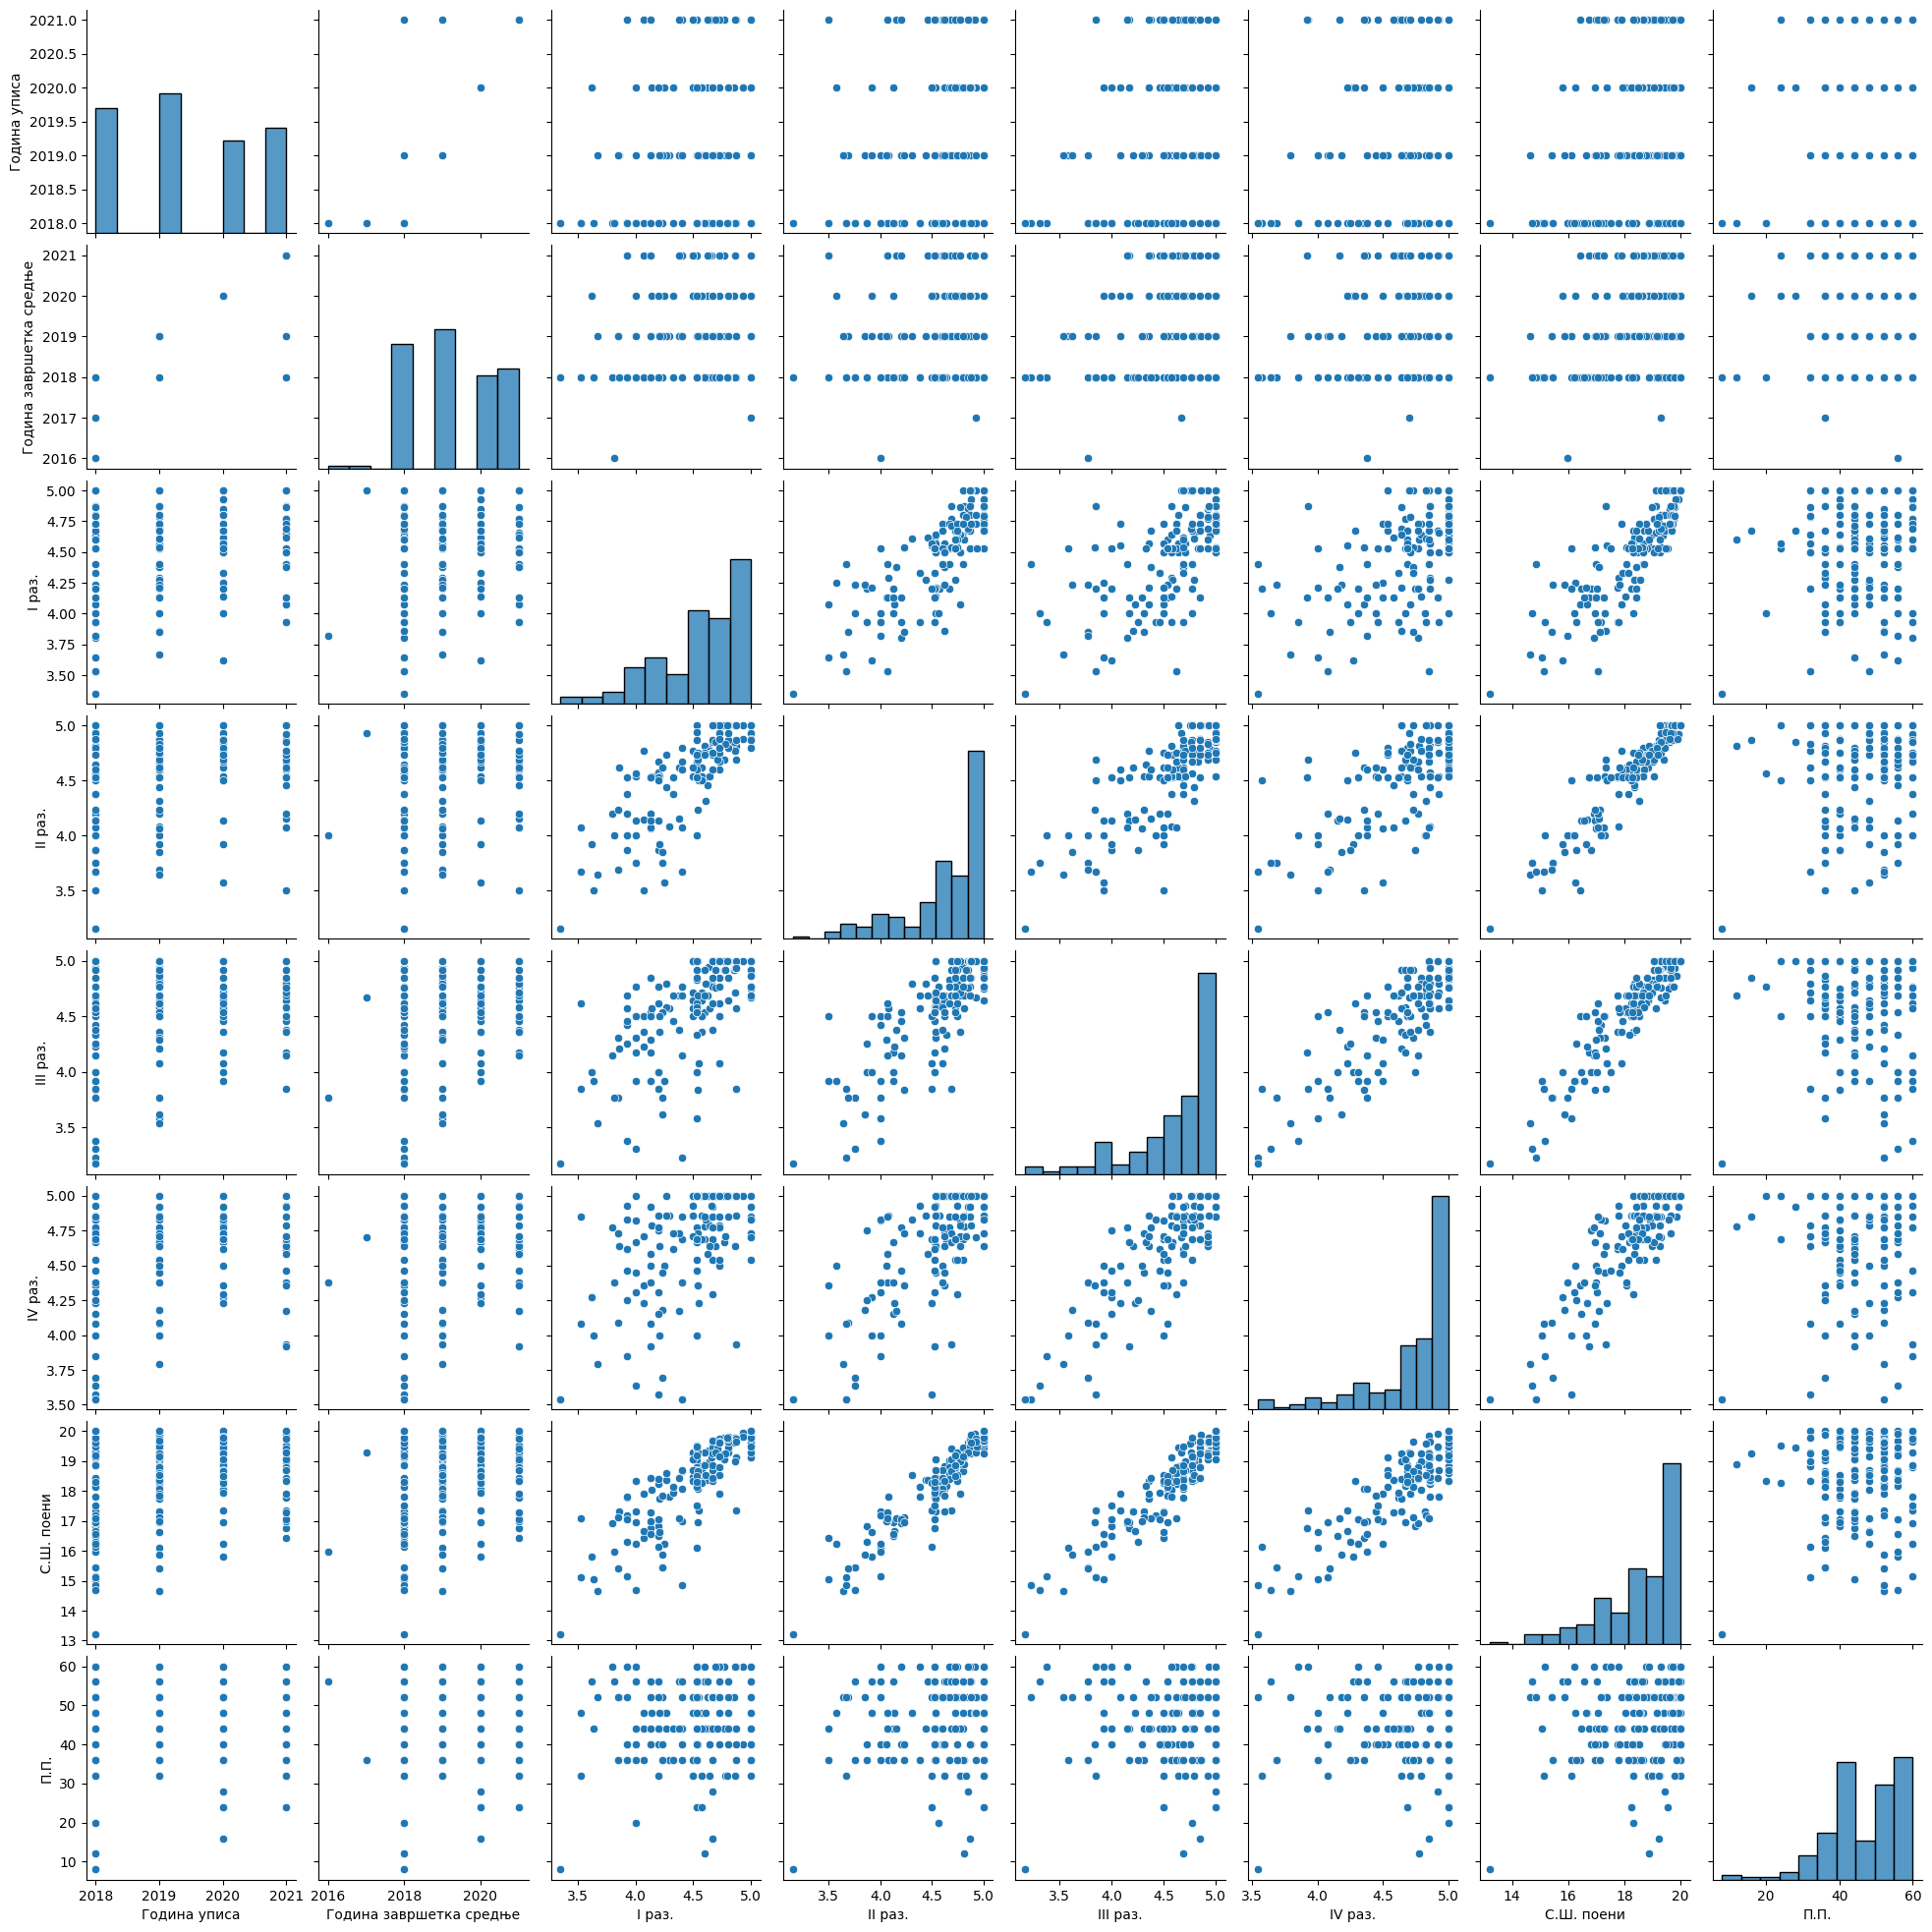

In [87]:
sns.pairplot(df1)
plt.show()

In [88]:
df1.describe(include='all')

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок
count,189,189.000000,189,189,189,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189
unique,4,NaN,5,39,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Софтверско инжињерство,NaN,Гимназија,Прва крагујевачка гимназија,Крагујевац,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Први конкурсни рок
freq,162,NaN,123,78,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189
mean,NaN,2019.386243,NaN,NaN,NaN,2019.338624,4.571270,4.635926,4.641429,4.735238,18.583862,46.941799,NaN
std,NaN,1.112798,NaN,NaN,NaN,1.140008,0.389758,0.400111,0.417691,0.347749,1.422300,10.100653,NaN
min,NaN,2018.000000,NaN,NaN,NaN,2016.000000,3.350000,3.150000,3.170000,3.540000,13.210000,8.000000,NaN
25%,NaN,2018.000000,NaN,NaN,NaN,2018.000000,4.290000,4.530000,4.500000,4.640000,17.840000,40.000000,NaN
50%,NaN,2019.000000,NaN,NaN,NaN,2019.000000,4.630000,4.750000,4.770000,4.860000,18.980000,48.000000,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,2020.000000,5.000000,5.000000,5.000000,5.000000,19.770000,56.000000,NaN


In [89]:
df1=df1.dropna()
df1

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок
0,Софтверско инжињерство,2019,Гимназија,Прва крагујевачка гимназија,Крагујевац,2019.0,4.13,4.20,4.54,4.08,16.95,40,Први конкурсни рок
1,Софтверско инжињерство,2020,Техничка,Прва Теничка школа,Крагујевац,2020.0,4.93,5.00,5.00,5.00,19.93,60,Први конкурсни рок
2,Софтверско инжињерство,2019,Техничка,Права Техничка школа,Крагујевац,2019.0,4.20,4.57,4.62,4.86,18.25,52,Први конкурсни рок
4,Софтверско инжињерство,2019,Гимназија,Пријепољска гимназија,Пријепоље,2019.0,5.00,5.00,5.00,5.00,20.00,40,Први конкурсни рок
5,Софтверско инжињерство,2021,Гимназија,Прва крагујевачка гимназија,Крагујевац,2021.0,4.77,5.00,5.00,5.00,19.77,60,Први конкурсни рок
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Рачунарске науке,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,4.00,4.00,3.92,4.31,16.23,60,Први конкурсни рок
373,Софтверско инжињерство,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,4.53,4.53,4.00,4.46,17.52,60,Први конкурсни рок
374,Софтверско инжињерство,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,5.00,5.00,5.00,5.00,20.00,60,Први конкурсни рок
375,Софтверско инжињерство,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,5.00,5.00,5.00,5.00,20.00,60,Први конкурсни рок


In [90]:
df1.isnull().sum()

Модул                      0
Година уписа               0
Тип средње школе           0
Назив средње школе         0
Град средње школе          0
Година завршетка средње    0
I раз.                     0
II раз.                    0
III раз.                   0
IV раз.                    0
С.Ш. поени                 0
П.П.                       0
Уписни рок                 0
dtype: int64

In [91]:
# transform data into numerical for Tip srednje skole
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


data = df1

# categorical colum = onehotencoder
categorical_columns = ['Тип средње школе']

# data clean 
data_cleaned = df1.dropna(subset=categorical_columns)

# Extract categorical column
data_categorical = data_cleaned[categorical_columns]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the categorical data
encoder.fit(data_categorical)

# Transform the categorical data into one-hot encoded features
encoded_features = encoder.transform(data_categorical).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with the cleaned dataset
data_encoded = pd.concat([data_cleaned.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_df], axis=1)

# Print the encoded dataset
data_encoded

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Модул,Година уписа,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок,Тип средње школе_Гимназија,Тип средње школе_Економска,Тип средње школе_Медицинска,Тип средње школе_Остале,Тип средње школе_Техничка
0,Софтверско инжињерство,2019,Прва крагујевачка гимназија,Крагујевац,2019.0,4.13,4.20,4.54,4.08,16.95,40,Први конкурсни рок,1.0,0.0,0.0,0.0,0.0
1,Софтверско инжињерство,2020,Прва Теничка школа,Крагујевац,2020.0,4.93,5.00,5.00,5.00,19.93,60,Први конкурсни рок,0.0,0.0,0.0,0.0,1.0
2,Софтверско инжињерство,2019,Права Техничка школа,Крагујевац,2019.0,4.20,4.57,4.62,4.86,18.25,52,Први конкурсни рок,0.0,0.0,0.0,0.0,1.0
3,Софтверско инжињерство,2019,Пријепољска гимназија,Пријепоље,2019.0,5.00,5.00,5.00,5.00,20.00,40,Први конкурсни рок,1.0,0.0,0.0,0.0,0.0
4,Софтверско инжињерство,2021,Прва крагујевачка гимназија,Крагујевац,2021.0,4.77,5.00,5.00,5.00,19.77,60,Први конкурсни рок,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Рачунарске науке,2018,Прва крагујевачка гимназија,Крагујевац,2018.0,4.00,4.00,3.92,4.31,16.23,60,Први конкурсни рок,1.0,0.0,0.0,0.0,0.0
185,Софтверско инжињерство,2018,Прва крагујевачка гимназија,Крагујевац,2018.0,4.53,4.53,4.00,4.46,17.52,60,Први конкурсни рок,1.0,0.0,0.0,0.0,0.0
186,Софтверско инжињерство,2018,Прва крагујевачка гимназија,Крагујевац,2018.0,5.00,5.00,5.00,5.00,20.00,60,Први конкурсни рок,1.0,0.0,0.0,0.0,0.0
187,Софтверско инжињерство,2018,Прва крагујевачка гимназија,Крагујевац,2018.0,5.00,5.00,5.00,5.00,20.00,60,Први конкурсни рок,1.0,0.0,0.0,0.0,0.0


In [92]:
data = df1
# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(data)

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_data, columns=data.columns)

# Print the encoded dataset
encoded_df

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python311\Lib\site-packages\s

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок
0,3.0,1.0,0.0,26.0,10.0,3.0,12.0,17.0,26.0,9.0,25.0,8.0,0.0
1,3.0,2.0,4.0,22.0,10.0,4.0,45.0,46.0,44.0,43.0,123.0,13.0,0.0
2,3.0,1.0,4.0,21.0,10.0,3.0,14.0,27.0,29.0,40.0,55.0,11.0,0.0
3,3.0,1.0,0.0,27.0,17.0,3.0,46.0,46.0,44.0,43.0,124.0,8.0,0.0
4,3.0,3.0,0.0,26.0,10.0,5.0,38.0,46.0,44.0,43.0,115.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2.0,0.0,0.0,26.0,10.0,2.0,10.0,10.0,10.0,18.0,14.0,13.0,0.0
185,3.0,0.0,0.0,26.0,10.0,2.0,24.0,24.0,11.0,22.0,41.0,13.0,0.0
186,3.0,0.0,0.0,26.0,10.0,2.0,46.0,46.0,44.0,43.0,124.0,13.0,0.0
187,3.0,0.0,0.0,26.0,10.0,2.0,46.0,46.0,44.0,43.0,124.0,13.0,0.0


In [93]:
nan_df1 = df1.isna().sum().sum()
df1

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок
0,Софтверско инжињерство,2019,Гимназија,Прва крагујевачка гимназија,Крагујевац,2019.0,4.13,4.20,4.54,4.08,16.95,40,Први конкурсни рок
1,Софтверско инжињерство,2020,Техничка,Прва Теничка школа,Крагујевац,2020.0,4.93,5.00,5.00,5.00,19.93,60,Први конкурсни рок
2,Софтверско инжињерство,2019,Техничка,Права Техничка школа,Крагујевац,2019.0,4.20,4.57,4.62,4.86,18.25,52,Први конкурсни рок
4,Софтверско инжињерство,2019,Гимназија,Пријепољска гимназија,Пријепоље,2019.0,5.00,5.00,5.00,5.00,20.00,40,Први конкурсни рок
5,Софтверско инжињерство,2021,Гимназија,Прва крагујевачка гимназија,Крагујевац,2021.0,4.77,5.00,5.00,5.00,19.77,60,Први конкурсни рок
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Рачунарске науке,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,4.00,4.00,3.92,4.31,16.23,60,Први конкурсни рок
373,Софтверско инжињерство,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,4.53,4.53,4.00,4.46,17.52,60,Први конкурсни рок
374,Софтверско инжињерство,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,5.00,5.00,5.00,5.00,20.00,60,Први конкурсни рок
375,Софтверско инжињерство,2018,Гимназија,Прва крагујевачка гимназија,Крагујевац,2018.0,5.00,5.00,5.00,5.00,20.00,60,Први конкурсни рок


In [94]:
# data preparation, creating new df by coping the encoded df and droping one column П.П, creating Y series for target variable that i need to predict
X = encoded_df.drop(columns = ['П.П.']).copy()
Y = encoded_df['П.П.']

In [95]:
# creating train and test with 60% for train and 40% for test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4)
X_train

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,Уписни рок
68,3.0,1.0,0.0,26.0,10.0,3.0,35.0,46.0,41.0,27.0,94.0,0.0
53,3.0,1.0,0.0,2.0,6.0,3.0,34.0,46.0,44.0,43.0,112.0,0.0
48,3.0,1.0,0.0,26.0,10.0,3.0,34.0,33.0,36.0,24.0,76.0,0.0
125,3.0,0.0,0.0,26.0,10.0,2.0,11.0,15.0,16.0,14.0,21.0,0.0
112,3.0,3.0,4.0,21.0,10.0,5.0,24.0,28.0,28.0,43.0,76.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,3.0,2.0,4.0,23.0,10.0,4.0,13.0,25.0,27.0,36.0,49.0,0.0
124,2.0,1.0,0.0,2.0,11.0,3.0,46.0,46.0,44.0,41.0,122.0,0.0
118,3.0,2.0,0.0,26.0,10.0,4.0,41.0,37.0,39.0,43.0,101.0,0.0
129,3.0,3.0,0.0,26.0,10.0,5.0,21.0,16.0,22.0,12.0,32.0,0.0


In [96]:
# showing the train and test shape
X_train, X_train.shape

print("podaci za treniranje", X_train.shape )
print("podaci za testiranje", X_test.shape )

podaci za treniranje (113, 12)
podaci za testiranje (76, 12)


In [97]:
from sklearn.linear_model import LinearRegression
# instance of the LinearRegression model
model = LinearRegression()

# Fit the model so it can be used to predict the outcome
model.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python311\Lib\site-pac

LinearRegression()

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)

Mean Squared Error: 8.125107678571997
Root Mean Squared Error: 2.850457450756281
Mean Absolute Error: 2.390649802033263
R-squared Score: -0.46717797703541586


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python311\Lib\site-pac

In [103]:
# Assume you have a new data point represented by a dictionary
new_data = {
    'Тип средње школе': ['Гимназија'],
    'Назив средње школе': ['Прва крагујевачка гимназија'],
    'Град средње школе': ['Крагујевац'],
    'С.Ш. поени': [20]
}

new_data_df = pd.DataFrame(new_data)

# Encode the categorical columns in the new data using the same encoder
encoded_new_data = encoder.transform(new_data_df[['Тип средње школе']]).toarray()


# Make the prediction using the trained model
prediction = model.predict(encoded_new_data)

# Print the predicted value
print('Predicted П.П. value:', prediction[0])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- I раз.
- II раз.
- III раз.
- IV раз.
- Година завршетка средње
- ...


In [ ]:
df1.head(20)

,Модул,Година уписа,Тип средње школе,Назив средње школе,Град средње школе,Година завршетка средње,I раз.,II раз.,III раз.,IV раз.,С.Ш. поени,П.П.,Уписни рок
0,Софтверско инжињерство,2019,Гимназија,Прва крагујевачка гимназија,Крагујевац,2019.0,4.13,4.20,4.54,4.08,16.95,40,Први конкурсни рок
1,Софтверско инжињерство,2020,Техничка,Прва Теничка школа,Крагујевац,2020.0,4.93,5.00,5.00,5.00,19.93,60,Први конкурсни рок
2,Софтверско инжињерство,2019,Техничка,Права Техничка школа,Крагујевац,2019.0,4.20,4.57,4.62,4.86,18.25,52,Први конкурсни рок
4,Софтверско инжињерство,2019,Гимназија,Пријепољска гимназија,Пријепоље,2019.0,5.00,5.00,5.00,5.00,20.00,40,Први конкурсни рок
5,Софтверско инжињерство,2021,Гимназија,Прва крагујевачка гимназија,Крагујевац,2021.0,4.77,5.00,5.00,5.00,19.77,60,Први конкурсни рок
7,Софтверско инжињерство,2019,Техничка,Права Техничка школа,Крагујевац,2019.0,4.53,4.00,3.58,4.00,16.11,36,Први конкурсни рок
10,Софтверско инжињерство,2019,Гимназија,Прва крагујевачка гимназија,Крагујевац,2019.0,4.53,4.67,4.83,5.00,19.03,36,Први конкурсни рок
14,Рачунарске науке,2019,Гимназија,Прва крагујевачка гимназија,Крагујевац,2019.0,4.67,4.87,5.00,5.00,19.54,52,Први конкурсни рок
15,Софтверско инжињерство,2021,Гимназија,Прва крагујевачка гимназија,Крагујевац,2021.0,5.00,5.00,5.00,5.00,20.00,60,Први конкурсни рок
17,Софтверско инжињерство,2020,Техничка,Прва Теничка школа,Крагујевац,2020.0,5.00,5.00,5.00,5.00,20.00,40,Први конкурсни рок
